In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from matplotlib import style

In [2]:
car_data = pd.read_csv("../input/vehicle-dataset-from-cardekho/car data.csv")

In [3]:
car_data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.info()  # to see more information about datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
#to check total number of null in datasets 
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
#to get information about statistics of each column in datasets
#but categorical data will not appear
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
#to know what is categorical data we will list all columns
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
#to count and list all category in fuel_type column
car_data["Fuel_Type"].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [9]:
car_data["Car_Name"].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [10]:
print(car_data["Car_Name"].value_counts())
print("======================================")
print(car_data["Fuel_Type"].value_counts())
print("======================================")
print(car_data["Transmission"].value_counts())
print("======================================")
print(car_data["Seller_Type"].value_counts())
print("======================================")

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [11]:
#to visulaize data using bar plot
seller_type = car_data["Seller_Type"]
transmission = car_data["Transmission"]
fuel_type = car_data["Fuel_Type"]
selling_price = car_data["Selling_Price"]

Text(0, 0.5, 'Selling_price')

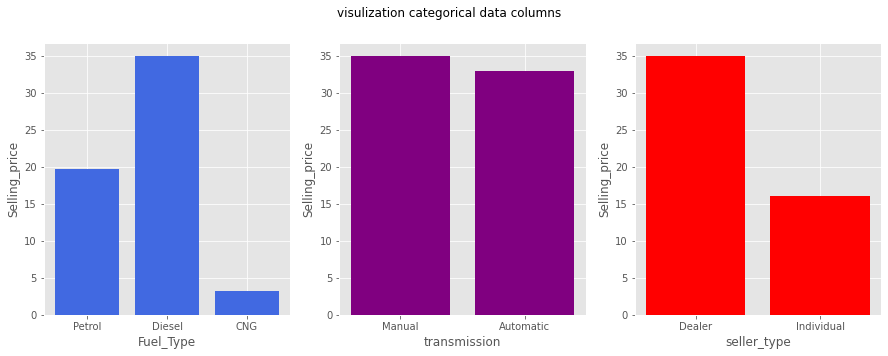

In [12]:
#this plot categorical data vs max of selling price 

style.use("ggplot")
fig = plt.figure(figsize = (15,5))
fig.suptitle("visulization categorical data columns")
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price,color = "royalblue")
plt.xlabel("Fuel_Type")
plt.ylabel("Selling_price")
plt.subplot(1,3,2)
plt.bar(transmission,selling_price,color = "purple")
plt.xlabel("transmission")
plt.ylabel("Selling_price")
plt.subplot(1,3,3)
plt.bar(seller_type,selling_price,color = "red")
plt.xlabel("seller_type")
plt.ylabel("Selling_price")


<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

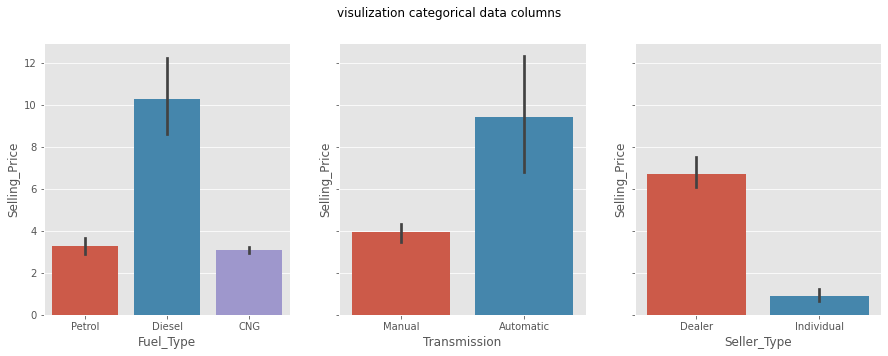

In [13]:
#this plot categorical data vs mean of selling price 
fig ,axes = plt.subplots(1,3,figsize=(15,5),sharey = True)
fig.suptitle("visulization categorical data columns")
sns.barplot(x = fuel_type , y = selling_price, ax = axes[0])
sns.barplot(x = transmission , y = selling_price, ax = axes[1])
sns.barplot(x = seller_type , y = selling_price, ax = axes[2])


In [14]:
petrol_data = car_data.groupby("Fuel_Type").get_group("Petrol")

In [15]:
petrol_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,2013.539749,3.264184,5.583556,33528.937238,0.050209
std,3.042674,3.135537,5.290685,40308.984886,0.270368
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.600000,0.940000,13850.000000,0.000000
50%,2014.000000,2.650000,4.600000,25870.000000,0.000000
75%,2016.000000,5.200000,7.980000,44271.000000,0.000000
max,2017.000000,19.750000,23.730000,500000.000000,3.000000


In [16]:
# manual encoding 
car_data.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}}, inplace = True)
#one hot encoding
car_data = pd.get_dummies(car_data , columns = ["Transmission","Seller_Type"],drop_first = True)

In [17]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Transmission_Manual,Seller_Type_Individual
0,ritz,2014,3.35,5.59,27000,0,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,0,1,0
3,wagon r,2011,2.85,4.15,5200,0,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


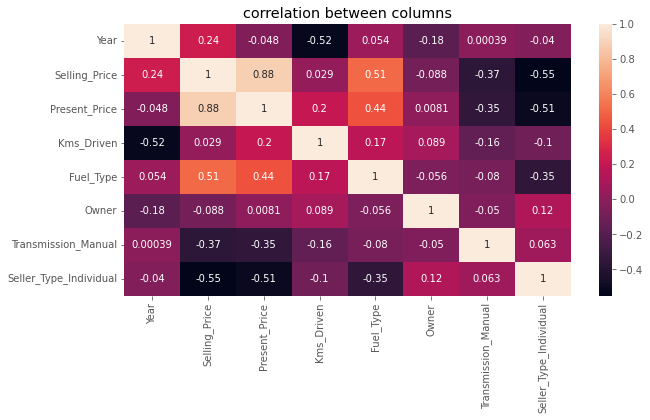

In [18]:
#ploting heat map to check which feature are correlated to output and which is not
#then will drop weakly correlated features and reduce number of features so that results will be better
plt.figure(figsize = (10, 5))

sns.heatmap(car_data.corr(),annot = True)
plt.title("correlation between columns")
plt.show()

In [19]:
car_data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Transmission_Manual,Seller_Type_Individual
Year,1.000000,0.236141,-0.047584,-0.524342,0.053643,-0.182104,0.000394,-0.039896
Selling_Price,0.236141,1.000000,0.878983,0.029187,0.509467,-0.088344,-0.367128,-0.550724
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.440415,0.008057,-0.348715,-0.512030
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.166801,0.089216,-0.162510,-0.101419
Fuel_Type,0.053643,0.509467,0.440415,0.166801,1.000000,-0.055705,-0.080466,-0.352415
Owner,-0.182104,-0.088344,0.008057,0.089216,-0.055705,1.000000,-0.050316,0.124269
Transmission_Manual,0.000394,-0.367128,-0.348715,-0.162510,-0.080466,-0.050316,1.000000,0.063240
Seller_Type_Individual,-0.039896,-0.550724,-0.512030,-0.101419,-0.352415,0.124269,0.063240,1.000000


<AxesSubplot:title={'center':'correlation between selling price and seller type'}, xlabel='Seller_Type_Individual', ylabel='Selling_Price'>

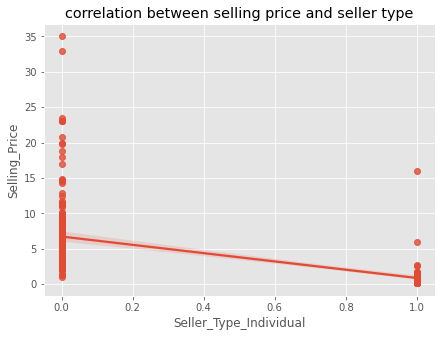

In [20]:
fig = plt.figure(figsize = (7,5))
plt.title("correlation between selling price and seller type")
sns.regplot(x =  "Seller_Type_Individual" , y = "Selling_Price" ,data = car_data)

<AxesSubplot:title={'center':'correlation between selling price and Present_Price'}, xlabel='Present_Price', ylabel='Selling_Price'>

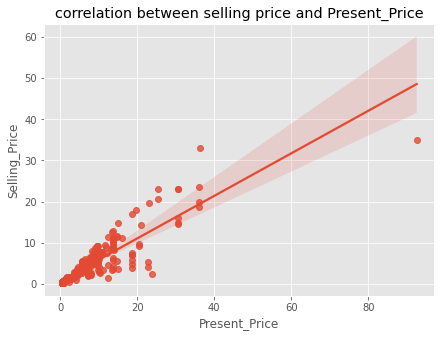

In [21]:
fig = plt.figure(figsize = (7,5))
plt.title("correlation between selling price and Present_Price")
sns.regplot(x =  "Present_Price" , y = "Selling_Price" ,data = car_data)

In [22]:
X = car_data.drop(["Car_Name","Selling_Price"],axis = 1)
y = car_data["Selling_Price"]

In [23]:
print("X shape",X.shape)
print("y shape",y.shape)

X shape (301, 7)
y shape (301,)


In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [25]:
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)

X_train shape (210, 7)
X_test shape (91, 7)


In [26]:
#scalling features to make traing faster and more efficient
scaler = StandardScaler()

In [27]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred  = model.predict(X_test)

In [31]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

print("MAE : ", mean_absolute_error(  y_pred,y_test))

MAE :  1.7128198959123142


In [32]:
print("MSE : ", mean_squared_error(y_test , y_pred))

MSE :  4.417879221232763


In [33]:
"""R2 indicates the proportion of data points which lie within the line created by 
the regression equation.A higher value of R2 is desirable as it indicates better results
max value is 1 and it may negative[bad cases]"""

print("r2_score : ", r2_score(y_test , y_pred))

r2_score :  0.8354521251874761


<AxesSubplot:title={'center':'correlation between actual and predicted  values'}, ylabel='Selling_Price'>

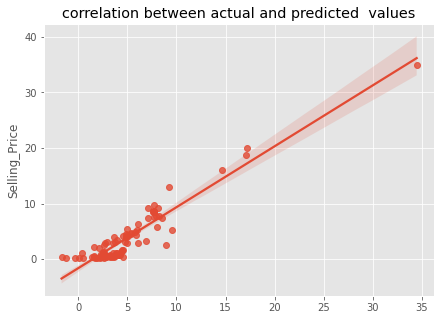

In [34]:
fig = plt.figure(figsize = (7,5))
plt.title("correlation between actual and predicted  values")
sns.regplot(x = y_pred  , y = y_test  )